In [ ]:
import numpy as np
from pathlib import Path


In [ ]:
data_base_dir= Path(r"C:\Users\omriber\Documents\Thesis\MultiSpectralCtrl\download")

data_fname = "cnt1_20210830_h15m53s38.npy"
data = np.load(Path(data_base_dir, data_fname))
data.shape

In [ ]:
import matplotlib.pyplot as plt

filters = [None, 8, 9, 10, 11, 12]
for scene in data_base_dir.glob("*.npy"):
    data = np.load(scene)
    fig, ax = plt.subplots(2, 3, figsize=(16,9))
    for ch, filter in enumerate(filters):
        ax[ch//3, ch%3].imshow(data[ch].mean(0), cmap="gray")
        ax[ch//3, ch%3].set_axis_off()
        if filter is not None:
            ax[ch//3, ch%3].set_title(f"{filter} " + "$\mu$m")
        else:
            ax[ch//3, ch%3].set_title("Pan-Chromatic")

    plt.suptitle(f"{scene.name.split('.')[0]} (nCaptures = {data.shape[1]})", fontsize=16)
    plt.tight_layout()


Analyzing the Vignetting:

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

fig = make_subplots(1, 2)
fig = px.imshow(data[0].mean(0), color_continuous_scale='gray')
fig.show()
fig = px.imshow(data[1].mean(0), color_continuous_scale='gray')
fig.show()



It seems like the vignetting amplifies objects in the center of the scene (compared to the panchromatic, which should logically exhibit higher intensities in the center).

## Noise Analysis
It might be a good idea to have an estimate of the noise level, in order to asses the required number of frames to average over to reduce the noise to a desired level.
To tackle this, let's pick a random pixel from a panchromatic image, and test it's variance over the 100 consequent frames:

In [ ]:

pix_idx = np.random.randint(low=[0 ,0], high=data.shape[2:], size=2)
pix_over_frames = data[0, :, pix_idx[0], pix_idx[1]]



<AxesSubplot:>

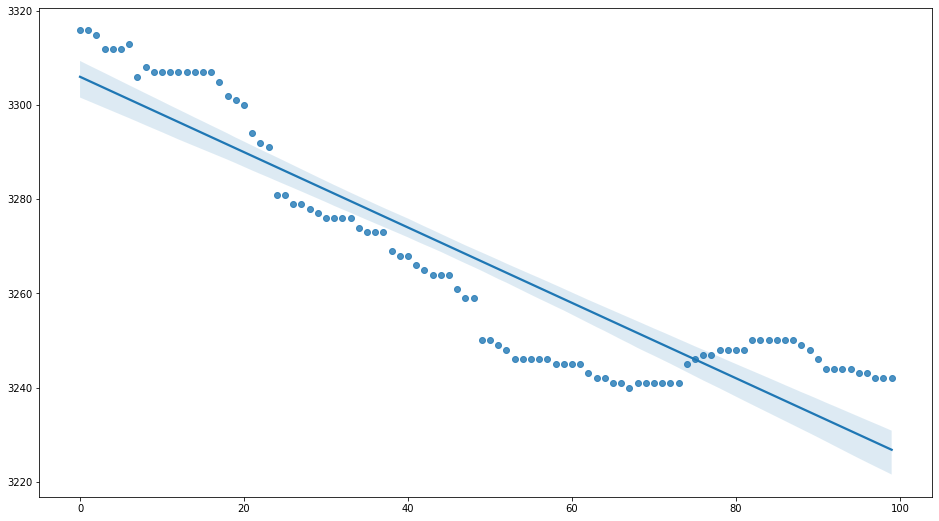

In [74]:
import seaborn as sns
# plt.figure(figsize=(16, 9))
# plt.scatter(x=range(len(pix_over_frames)), y=pix_over_frames)
plt.figure(figsize=(16, 9))
sns.regplot(x=np.arange(len(pix_over_frames)), y=pix_over_frames)


Clearly, the observations don't follow a simple gaussian noise pattern. Nuisance phenomena:
1. First 2 frames appear to be outliers
2. There's a clear pisitive drift as the frames progress

It would be interesting to acquire many consequent frames (>1K) to see whether the drift saturates.